In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')   
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
print("Shape:", df.shape)
print(df.columns.tolist())
df.head()


Shape: (541909, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
print("Missing per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Duplicate rows: 5268


In [9]:
print("Rows with missing CustomerID by Country:")
print(df[df['CustomerID'].isnull()]['Country'].value_counts().head(10))

Rows with missing CustomerID by Country:
Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: count, dtype: int64


In [10]:
import pandas as pd
import numpy as np

def comprehensive_data_cleaning(df):
    """
    Comprehensive cleaning function for the retail dataset
    """
    print("🔄 STARTING DATA CLEANING PROCESS")
    print("=" * 50)
    print(f"Original dataset shape: {df.shape}")
    
    # Create a copy to avoid modifying original
    df_clean = df.copy()
    
    # 1. REMOVE DUPLICATES
    print("\n1. HANDLING DUPLICATES")
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    duplicates_removed = initial_rows - len(df_clean)
    print(f"✅ Removed {duplicates_removed} duplicate rows")
    
    # 2. HANDLE MISSING VALUES
    print("\n2. HANDLING MISSING VALUES")
    
    # Check current missing values
    missing_before = df_clean.isnull().sum()
    print("Missing values before cleaning:")
    for col, count in missing_before[missing_before > 0].items():
        print(f"   {col}: {count} ({count/len(df_clean):.1%})")
    
    # Strategy for each column with missing values
    # Description - remove rows (essential field)
    if 'Description' in df_clean.columns:
        df_clean = df_clean.dropna(subset=['Description'])
        print("✅ Removed rows with missing Description")
    
    # CustomerID - fill based on country pattern
    if 'CustomerID' in df_clean.columns:
        # Keep UK anonymous transactions, remove others
        non_uk_missing_mask = (df_clean['CustomerID'].isnull()) & (df_clean['Country'] != 'United Kingdom')
        df_clean = df_clean[~non_uk_missing_mask]
        
        # Fill remaining missing CustomerID
        df_clean['CustomerID'] = df_clean['CustomerID'].fillna('ANONYMOUS_UK')
        print("✅ Handled missing CustomerID strategically")
    
    # 3. DATA VALIDATION & QUALITY CHECKS
    print("\n3. DATA VALIDATION")
    
    # Remove invalid transactions (negative/zero quantities/prices)
    if 'Quantity' in df_clean.columns:
        invalid_quantity = len(df_clean[df_clean['Quantity'] <= 0])
        df_clean = df_clean[df_clean['Quantity'] > 0]
        print(f"✅ Removed {invalid_quantity} rows with invalid Quantity")
    
    if 'UnitPrice' in df_clean.columns:
        invalid_price = len(df_clean[df_clean['UnitPrice'] <= 0])
        df_clean = df_clean[df_clean['UnitPrice'] > 0]
        print(f"✅ Removed {invalid_quantity} rows with invalid UnitPrice")
    
    # 4. DATA TYPE OPTIMIZATION
    print("\n4. DATA TYPE OPTIMIZATION")
    
    # Convert CustomerID to string (if numeric)
    if 'CustomerID' in df_clean.columns:
        df_clean['CustomerID'] = df_clean['CustomerID'].astype(str)
    
    # Convert InvoiceDate to datetime if exists
    if 'InvoiceDate' in df_clean.columns:
        df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
        print("✅ Converted InvoiceDate to datetime")
    
    # 5. FINAL CLEANUP
    df_clean = df_clean.reset_index(drop=True)
    
    # 6. FINAL REPORT
    print("\n" + "=" * 50)
    print("📊 CLEANING COMPLETE - FINAL REPORT")
    print("=" * 50)
    
    print(f"Final dataset shape: {df_clean.shape}")
    print(f"Total rows removed: {len(df) - len(df_clean)}")
    
    print("\nMissing values after cleaning:")
    missing_after = df_clean.isnull().sum()
    if missing_after.sum() == 0:
        print("   ✅ No missing values remaining!")
    else:
        for col, count in missing_after[missing_after > 0].items():
            print(f"   {col}: {count}")
    
    print(f"\nDuplicate check: {df_clean.duplicated().sum()} duplicates remaining")
    
    # Memory usage optimization
    original_memory = df.memory_usage(deep=True).sum() / 1024**2
    final_memory = df_clean.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory usage: {original_memory:.1f}MB → {final_memory:.1f}MB")
    
    return df_clean

# Execute the cleaning
df_cleaned = comprehensive_data_cleaning(df)

# Display the cleaned data
print("\n" + "=" * 50)
print("🧹 CLEANED DATASET PREVIEW")
print("=" * 50)
display(df_cleaned.head())
print(f"\nCleaned dataset shape: {df_cleaned.shape}")

🔄 STARTING DATA CLEANING PROCESS
Original dataset shape: (541909, 8)

1. HANDLING DUPLICATES
✅ Removed 5268 duplicate rows

2. HANDLING MISSING VALUES
Missing values before cleaning:
   Description: 1454 (0.3%)
   CustomerID: 135037 (25.2%)
✅ Removed rows with missing Description
✅ Handled missing CustomerID strategically

3. DATA VALIDATION
✅ Removed 9666 rows with invalid Quantity
✅ Removed 9666 rows with invalid UnitPrice

4. DATA TYPE OPTIMIZATION
✅ Converted InvoiceDate to datetime

📊 CLEANING COMPLETE - FINAL REPORT
Final dataset shape: (523474, 8)
Total rows removed: 18435

Missing values after cleaning:
   ✅ No missing values remaining!

Duplicate check: 0 duplicates remaining
Memory usage: 173.1MB → 164.0MB

🧹 CLEANED DATASET PREVIEW


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom



Cleaned dataset shape: (523474, 8)


In [11]:
# Create analytical features
df_cleaned['TotalValue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year

print("🛒 E-COMMERCE ANALYSIS STARTED")
print("=" * 50)
print(f"Analysis Period: {df_cleaned['InvoiceDate'].min().date()} to {df_cleaned['InvoiceDate'].max().date()}")
print(f"Total Revenue: £{df_cleaned['TotalValue'].sum():,.2f}")
print(f"Total Products: {df_cleaned['StockCode'].nunique():,}")
print(f"Total Transactions: {df_cleaned['InvoiceNo'].nunique():,}")

🛒 E-COMMERCE ANALYSIS STARTED
Analysis Period: 2010-12-01 to 2011-12-09
Total Revenue: £10,603,928.34
Total Products: 3,921
Total Transactions: 19,905


In [12]:
print("\n🏆 BEST-SELLING PRODUCTS ANALYSIS")
print("=" * 40)

# Product performance metrics
product_analysis = df_cleaned.groupby(['StockCode', 'Description']).agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique',  # Number of transactions
    'UnitPrice': 'mean'
}).round(2)

product_analysis = product_analysis.rename(columns={
    'TotalValue': 'TotalRevenue',
    'InvoiceNo': 'TransactionCount',
    'UnitPrice': 'AvgUnitPrice'
})

# Top 10 products by revenue
top_products_revenue = product_analysis.nlargest(10, 'TotalRevenue')
print("\n📈 TOP 10 PRODUCTS BY REVENUE:")
for i, (idx, row) in enumerate(top_products_revenue.iterrows(), 1):
    stock_code, description = idx
    print(f"{i:2d}. {description[:50]}... | Revenue: £{row['TotalRevenue']:>10,.2f} | Quantity: {row['Quantity']:>6}")

# Top 10 products by quantity
top_products_quantity = product_analysis.nlargest(10, 'Quantity')
print("\n📦 TOP 10 PRODUCTS BY QUANTITY SOLD:")
for i, (idx, row) in enumerate(top_products_quantity.iterrows(), 1):
    stock_code, description = idx
    print(f"{i:2d}. {description[:50]}... | Quantity: {row['Quantity']:>6} | Revenue: £{row['TotalRevenue']:>10,.2f}")


🏆 BEST-SELLING PRODUCTS ANALYSIS

📈 TOP 10 PRODUCTS BY REVENUE:
 1. DOTCOM POSTAGE... | Revenue: £206,248.77 | Quantity:  706.0
 2. REGENCY CAKESTAND 3 TIER... | Revenue: £173,547.84 | Quantity: 13801.0
 3. PAPER CRAFT , LITTLE BIRDIE... | Revenue: £168,469.60 | Quantity: 80995.0
 4. WHITE HANGING HEART T-LIGHT HOLDER... | Revenue: £104,078.74 | Quantity: 37506.0
 5. PARTY BUNTING... | Revenue: £ 99,334.38 | Quantity: 18260.0
 6. JUMBO BAG RED RETROSPOT... | Revenue: £ 94,140.31 | Quantity: 48361.0
 7. MEDIUM CERAMIC TOP STORAGE JAR... | Revenue: £ 81,700.92 | Quantity: 78033.0
 8. POSTAGE... | Revenue: £ 77,926.88 | Quantity: 3148.0
 9. Manual... | Revenue: £ 68,511.14 | Quantity: 6978.0
10. RABBIT NIGHT LIGHT... | Revenue: £ 66,775.07 | Quantity: 30690.0

📦 TOP 10 PRODUCTS BY QUANTITY SOLD:
 1. PAPER CRAFT , LITTLE BIRDIE... | Quantity: 80995.0 | Revenue: £168,469.60
 2. MEDIUM CERAMIC TOP STORAGE JAR... | Quantity: 78033.0 | Revenue: £ 81,700.92
 3. WORLD WAR 2 GLIDERS ASSTD DESIGN

In [13]:
print("\n📊 SALES TRENDS ANALYSIS")
print("=" * 40)

# Monthly trends
monthly_trends = df_cleaned.groupby('YearMonth').agg({
    'TotalValue': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'CustomerID': lambda x: x.nunique() if 'CustomerID' in df_cleaned.columns else 0
}).rename(columns={
    'TotalValue': 'MonthlyRevenue',
    'InvoiceNo': 'TransactionCount',
    'Quantity': 'TotalQuantity',
    'CustomerID': 'UniqueCustomers'
})

# Calculate growth rates
monthly_trends['RevenueGrowth'] = monthly_trends['MonthlyRevenue'].pct_change() * 100
monthly_trends['TransactionGrowth'] = monthly_trends['TransactionCount'].pct_change() * 100

print("\n📅 MONTHLY PERFORMANCE SUMMARY:")
for period, data in monthly_trends.iterrows():
    print(f"{period}: £{data['MonthlyRevenue']:>8,.0f} | {data['TransactionCount']:>3} transactions | "
          f"Growth: {data['RevenueGrowth']:>6.1f}%")

# Identify best/worst months
best_month = monthly_trends['MonthlyRevenue'].idxmax()
worst_month = monthly_trends['MonthlyRevenue'].idxmin()
print(f"\n🎯 Best Month: {best_month} (£{monthly_trends.loc[best_month, 'MonthlyRevenue']:,.0f})")
print(f"📉 Worst Month: {worst_month} (£{monthly_trends.loc[worst_month, 'MonthlyRevenue']:,.0f})")


📊 SALES TRENDS ANALYSIS

📅 MONTHLY PERFORMANCE SUMMARY:
2010-12: £ 820,028 | 1556.0 transactions | Growth:    nan%
2011-01: £ 687,201 | 1084.0 transactions | Growth:  -16.2%
2011-02: £ 520,453 | 1096.0 transactions | Growth:  -24.3%
2011-03: £ 713,108 | 1452.0 transactions | Growth:   37.0%
2011-04: £ 535,319 | 1244.0 transactions | Growth:  -24.9%
2011-05: £ 765,101 | 1675.0 transactions | Growth:   42.9%
2011-06: £ 754,616 | 1527.0 transactions | Growth:   -1.4%
2011-07: £ 715,336 | 1468.0 transactions | Growth:   -5.2%
2011-08: £ 753,641 | 1357.0 transactions | Growth:    5.4%
2011-09: £1,050,982 | 1832.0 transactions | Growth:   39.5%
2011-10: £1,149,826 | 2035.0 transactions | Growth:    9.4%
2011-11: £1,500,888 | 2761.0 transactions | Growth:   30.5%
2011-12: £ 637,428 | 818.0 transactions | Growth:  -57.5%

🎯 Best Month: 2011-11 (£1,500,888)
📉 Worst Month: 2011-02 (£520,453)


In [14]:
print("\n💰 HIGH-REVENUE CATEGORIES ANALYSIS")
print("=" * 45)

# Create product categories based on description patterns
def categorize_product(description):
    desc_lower = str(description).lower()
    if any(word in desc_lower for word in ['bag', 'case', 'holder', 'box']):
        return 'Accessories'
    elif any(word in desc_lower for word in ['decoration', 'ornament', 'garland']):
        return 'Decorations'
    elif any(word in desc_lower for word in ['light', 'lamp', 'candle']):
        return 'Lighting'
    elif any(word in desc_lower for word in ['vintage', 'retro', 'antique']):
        return 'Vintage'
    elif any(word in desc_lower for word in ['set', 'pack', 'assortment']):
        return 'Sets/Bundles'
    else:
        return 'Other'

# Apply categorization
df_cleaned['ProductCategory'] = df_cleaned['Description'].apply(categorize_product)

# Category performance
category_analysis = df_cleaned.groupby('ProductCategory').agg({
    'TotalValue': ['sum', 'mean'],
    'Quantity': 'sum',
    'StockCode': 'nunique',
    'InvoiceNo': 'nunique'
}).round(2)

category_analysis.columns = ['TotalRevenue', 'AvgTransactionValue', 'TotalQuantity', 'UniqueProducts', 'TransactionCount']
category_analysis = category_analysis.sort_values('TotalRevenue', ascending=False)

print("\n🏷️  REVENUE BY PRODUCT CATEGORY:")
for category, row in category_analysis.iterrows():
    revenue_share = (row['TotalRevenue'] / category_analysis['TotalRevenue'].sum()) * 100
    print(f"• {category:<15} | Revenue: £{row['TotalRevenue']:>9,.0f} ({revenue_share:.1f}%) | "
          f"Products: {row['UniqueProducts']:>3} | Transactions: {row['TransactionCount']:>4}")


💰 HIGH-REVENUE CATEGORIES ANALYSIS

🏷️  REVENUE BY PRODUCT CATEGORY:
• Other           | Revenue: £5,759,288 (54.3%) | Products: 2471.0 | Transactions: 18475.0
• Accessories     | Revenue: £2,257,850 (21.3%) | Products: 508.0 | Transactions: 14867.0
• Vintage         | Revenue: £1,045,620 (9.9%) | Products: 289.0 | Transactions: 12781.0
• Sets/Bundles    | Revenue: £  794,146 (7.5%) | Products: 326.0 | Transactions: 11155.0
• Lighting        | Revenue: £  499,158 (4.7%) | Products: 220.0 | Transactions: 7762.0
• Decorations     | Revenue: £  247,866 (2.3%) | Products: 142.0 | Transactions: 5898.0


In [15]:
print("\n👥 CUSTOMER VALUE ANALYSIS")
print("=" * 35)

if 'CustomerID' in df_cleaned.columns:
    # Filter out anonymous customers
    registered_customers = df_cleaned[df_cleaned['CustomerID'] != 'ANONYMOUS_UK']
    
    if len(registered_customers) > 0:
        customer_analysis = registered_customers.groupby('CustomerID').agg({
            'TotalValue': 'sum',
            'InvoiceNo': 'nunique',
            'Quantity': 'sum',
            'InvoiceDate': ['min', 'max']
        }).round(2)
        
        customer_analysis.columns = ['TotalSpent', 'TransactionCount', 'TotalItems', 'FirstPurchase', 'LastPurchase']
        
        # Customer segmentation
        customer_analysis['AvgTransactionValue'] = customer_analysis['TotalSpent'] / customer_analysis['TransactionCount']
        
        print(f"\n📊 CUSTOMER BASE: {len(customer_analysis):,} registered customers")
        print(f"💵 Total Customer Revenue: £{customer_analysis['TotalSpent'].sum():,.2f}")
        print(f"📦 Average Transactions per Customer: {customer_analysis['TransactionCount'].mean():.1f}")
        print(f"💰 Average Spend per Customer: £{customer_analysis['TotalSpent'].mean():.2f}")
        
        # Top customers
        top_customers = customer_analysis.nlargest(5, 'TotalSpent')
        print("\n⭐ TOP 5 CUSTOMERS:")
        for i, (cust_id, data) in enumerate(top_customers.iterrows(), 1):
            print(f"{i}. Customer {cust_id}: £{data['TotalSpent']:,.2f} | {data['TransactionCount']} transactions")


👥 CUSTOMER VALUE ANALYSIS

📊 CUSTOMER BASE: 4,338 registered customers
💵 Total Customer Revenue: £8,887,208.89
📦 Average Transactions per Customer: 4.3
💰 Average Spend per Customer: £2048.69

⭐ TOP 5 CUSTOMERS:
1. Customer 14646.0: £280,206.02 | 73 transactions
2. Customer 18102.0: £259,657.30 | 60 transactions
3. Customer 17450.0: £194,390.79 | 46 transactions
4. Customer 16446.0: £168,472.50 | 2 transactions
5. Customer 14911.0: £143,711.17 | 201 transactions


In [16]:
print("\n🎯 KEY PERFORMANCE INDICATORS")
print("=" * 35)

# Calculate KPIs
total_revenue = df_cleaned['TotalValue'].sum()
total_transactions = df_cleaned['InvoiceNo'].nunique()
total_products = df_cleaned['StockCode'].nunique()
avg_transaction_value = total_revenue / total_transactions
items_per_transaction = df_cleaned['Quantity'].sum() / total_transactions

kpis = {
    'Total Revenue': f'£{total_revenue:,.2f}',
    'Total Transactions': f'{total_transactions:,}',
    'Total Products': f'{total_products:,}',
    'Average Transaction Value': f'£{avg_transaction_value:.2f}',
    'Items per Transaction': f'{items_per_transaction:.1f}',
    'Analysis Period (Days)': f'{(df_cleaned["InvoiceDate"].max() - df_cleaned["InvoiceDate"].min()).days}',
    'Daily Average Revenue': f'£{total_revenue/(df_cleaned["InvoiceDate"].max() - df_cleaned["InvoiceDate"].min()).days:,.2f}'
}

for kpi, value in kpis.items():
    print(f"• {kpi:<30}: {value:>15}")


🎯 KEY PERFORMANCE INDICATORS
• Total Revenue                 :  £10,603,928.34
• Total Transactions            :          19,905
• Total Products                :           3,921
• Average Transaction Value     :         £532.73
• Items per Transaction         :           279.2
• Analysis Period (Days)        :             373
• Daily Average Revenue         :      £28,428.76


In [17]:
print("\n💡 ACTIONABLE INSIGHTS & RECOMMENDATIONS")
print("=" * 50)

# Generate insights
best_product = product_analysis.nlargest(1, 'TotalRevenue').iloc[0]
best_category = category_analysis.nlargest(1, 'TotalRevenue').iloc[0]
peak_month = monthly_trends.nlargest(1, 'MonthlyRevenue').iloc[0]

insights = [
    f"🎯 Focus on your top product category '{category_analysis.index[0]}' which generates {category_analysis.iloc[0]['TotalRevenue']/total_revenue*100:.1f}% of revenue",
    f"📈 Your best month was {monthly_trends['MonthlyRevenue'].idxmax()} - consider running promotions during this period",
    f"⭐ Your top product generates £{best_product['TotalRevenue']:,.0f} - ensure adequate stock and marketing",
    f"💰 Average customer transaction value is £{avg_transaction_value:.2f} - consider upselling strategies",
    f"🔄 {len(product_analysis[product_analysis['TransactionCount'] == 1])} products only sold once - review product assortment"
]

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print(f"\n📊 Overall Performance: {'Strong' if total_revenue > 1000000 else 'Moderate' if total_revenue > 500000 else 'Needs Improvement'}")


💡 ACTIONABLE INSIGHTS & RECOMMENDATIONS
1. 🎯 Focus on your top product category 'Other' which generates 54.3% of revenue
2. 📈 Your best month was 2011-11 - consider running promotions during this period
3. ⭐ Your top product generates £206,249 - ensure adequate stock and marketing
4. 💰 Average customer transaction value is £532.73 - consider upselling strategies
5. 🔄 201 products only sold once - review product assortment

📊 Overall Performance: Strong


In [18]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Set up the visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Currency formatter
def currency_formatter(x, pos):
    return '£{:,.0f}'.format(x)

currency_fmt = FuncFormatter(currency_formatter)

📈 STEP 2: REVENUE & SALES TRENDS


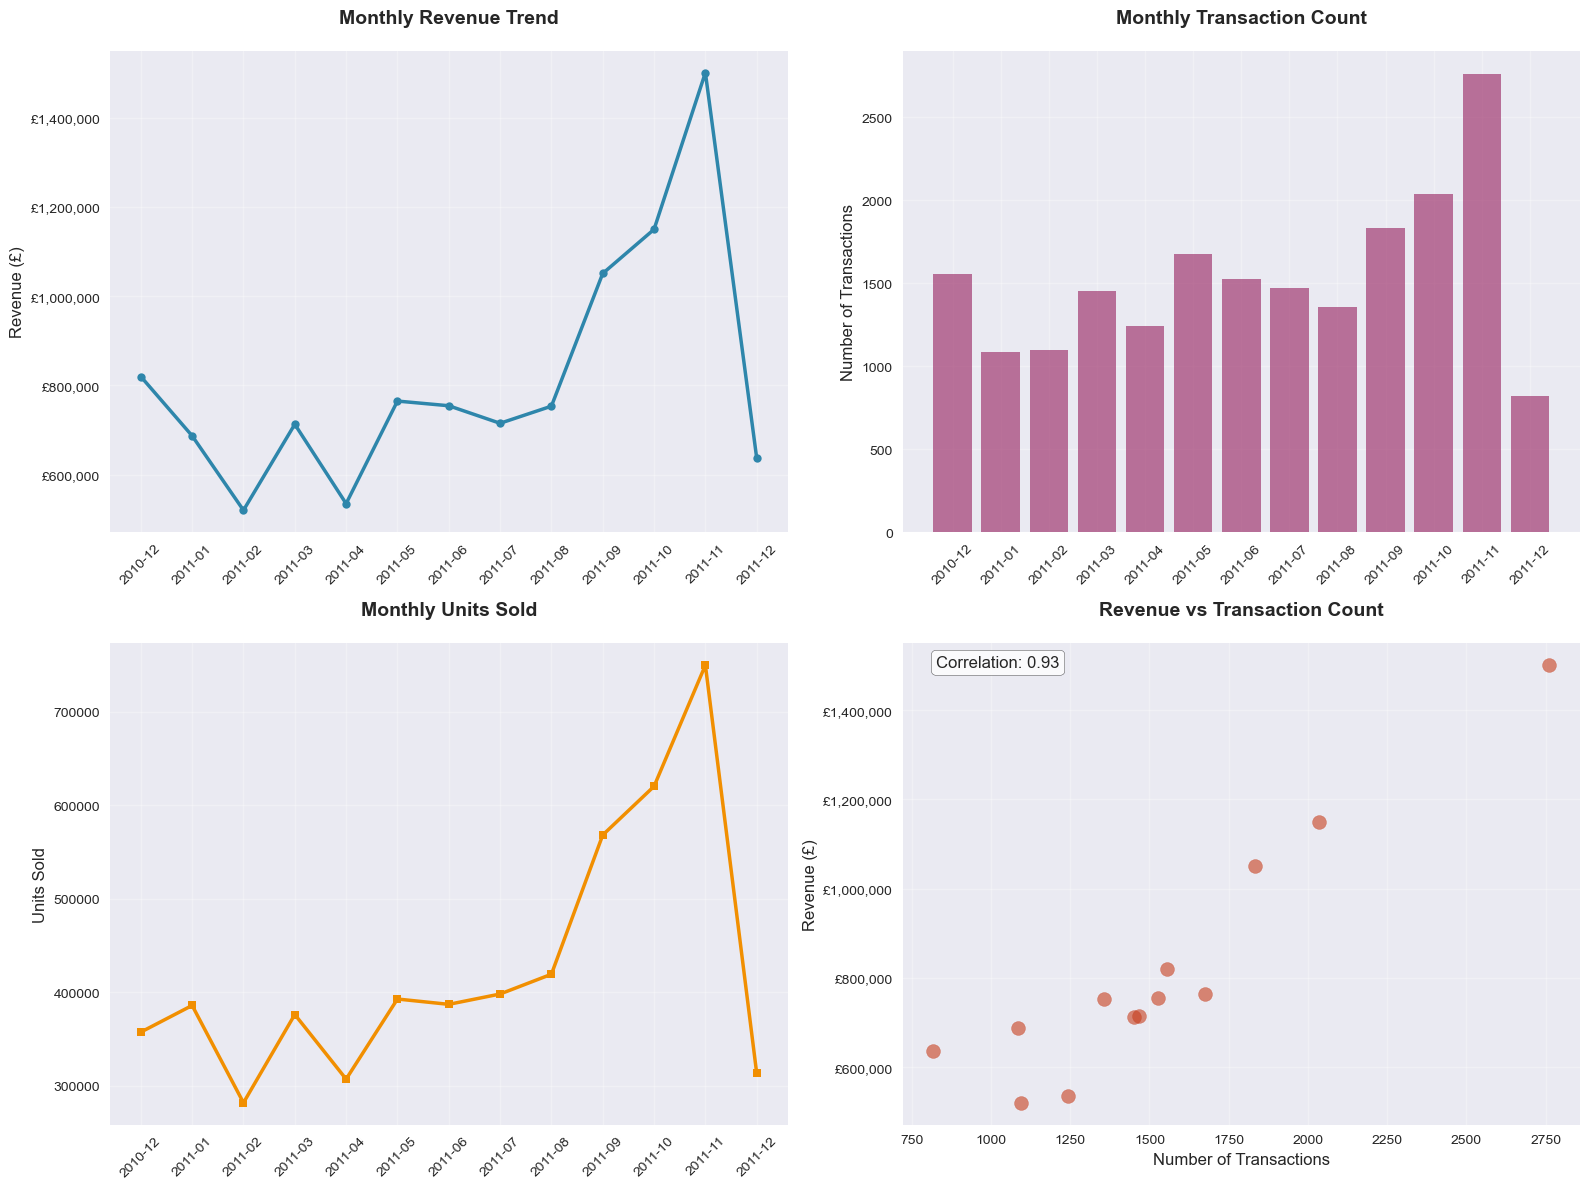

In [19]:
print("📈 STEP 2: REVENUE & SALES TRENDS")
print("=" * 40)

# Create monthly trends data
monthly_data = df_cleaned.groupby('YearMonth').agg({
    'TotalValue': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    'TotalValue': 'Revenue',
    'InvoiceNo': 'Transactions',
    'Quantity': 'UnitsSold'
})

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Monthly Revenue Trend
axes[0,0].plot(monthly_data.index.astype(str), monthly_data['Revenue'], 
               marker='o', linewidth=2.5, color='#2E86AB', markersize=6)
axes[0,0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold', pad=20)
axes[0,0].set_ylabel('Revenue (£)', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].yaxis.set_major_formatter(currency_fmt)
axes[0,0].grid(True, alpha=0.3)

# 2. Monthly Transactions
axes[0,1].bar(monthly_data.index.astype(str), monthly_data['Transactions'], 
              color='#A23B72', alpha=0.7)
axes[0,1].set_title('Monthly Transaction Count', fontsize=14, fontweight='bold', pad=20)
axes[0,1].set_ylabel('Number of Transactions', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Monthly Units Sold
axes[1,0].plot(monthly_data.index.astype(str), monthly_data['UnitsSold'], 
               marker='s', linewidth=2.5, color='#F18F01', markersize=6)
axes[1,0].set_title('Monthly Units Sold', fontsize=14, fontweight='bold', pad=20)
axes[1,0].set_ylabel('Units Sold', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Revenue vs Transactions Scatter
axes[1,1].scatter(monthly_data['Transactions'], monthly_data['Revenue'], 
                  s=100, alpha=0.6, color='#C73E1D')
axes[1,1].set_title('Revenue vs Transaction Count', fontsize=14, fontweight='bold', pad=20)
axes[1,1].set_xlabel('Number of Transactions', fontsize=12)
axes[1,1].set_ylabel('Revenue (£)', fontsize=12)
axes[1,1].yaxis.set_major_formatter(currency_fmt)
axes[1,1].grid(True, alpha=0.3)

# Add correlation value
correlation = monthly_data['Transactions'].corr(monthly_data['Revenue'])
axes[1,1].text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
               transform=axes[1,1].transAxes, fontsize=12,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()


🏆 STEP 3: BEST-SELLING PRODUCTS ANALYSIS


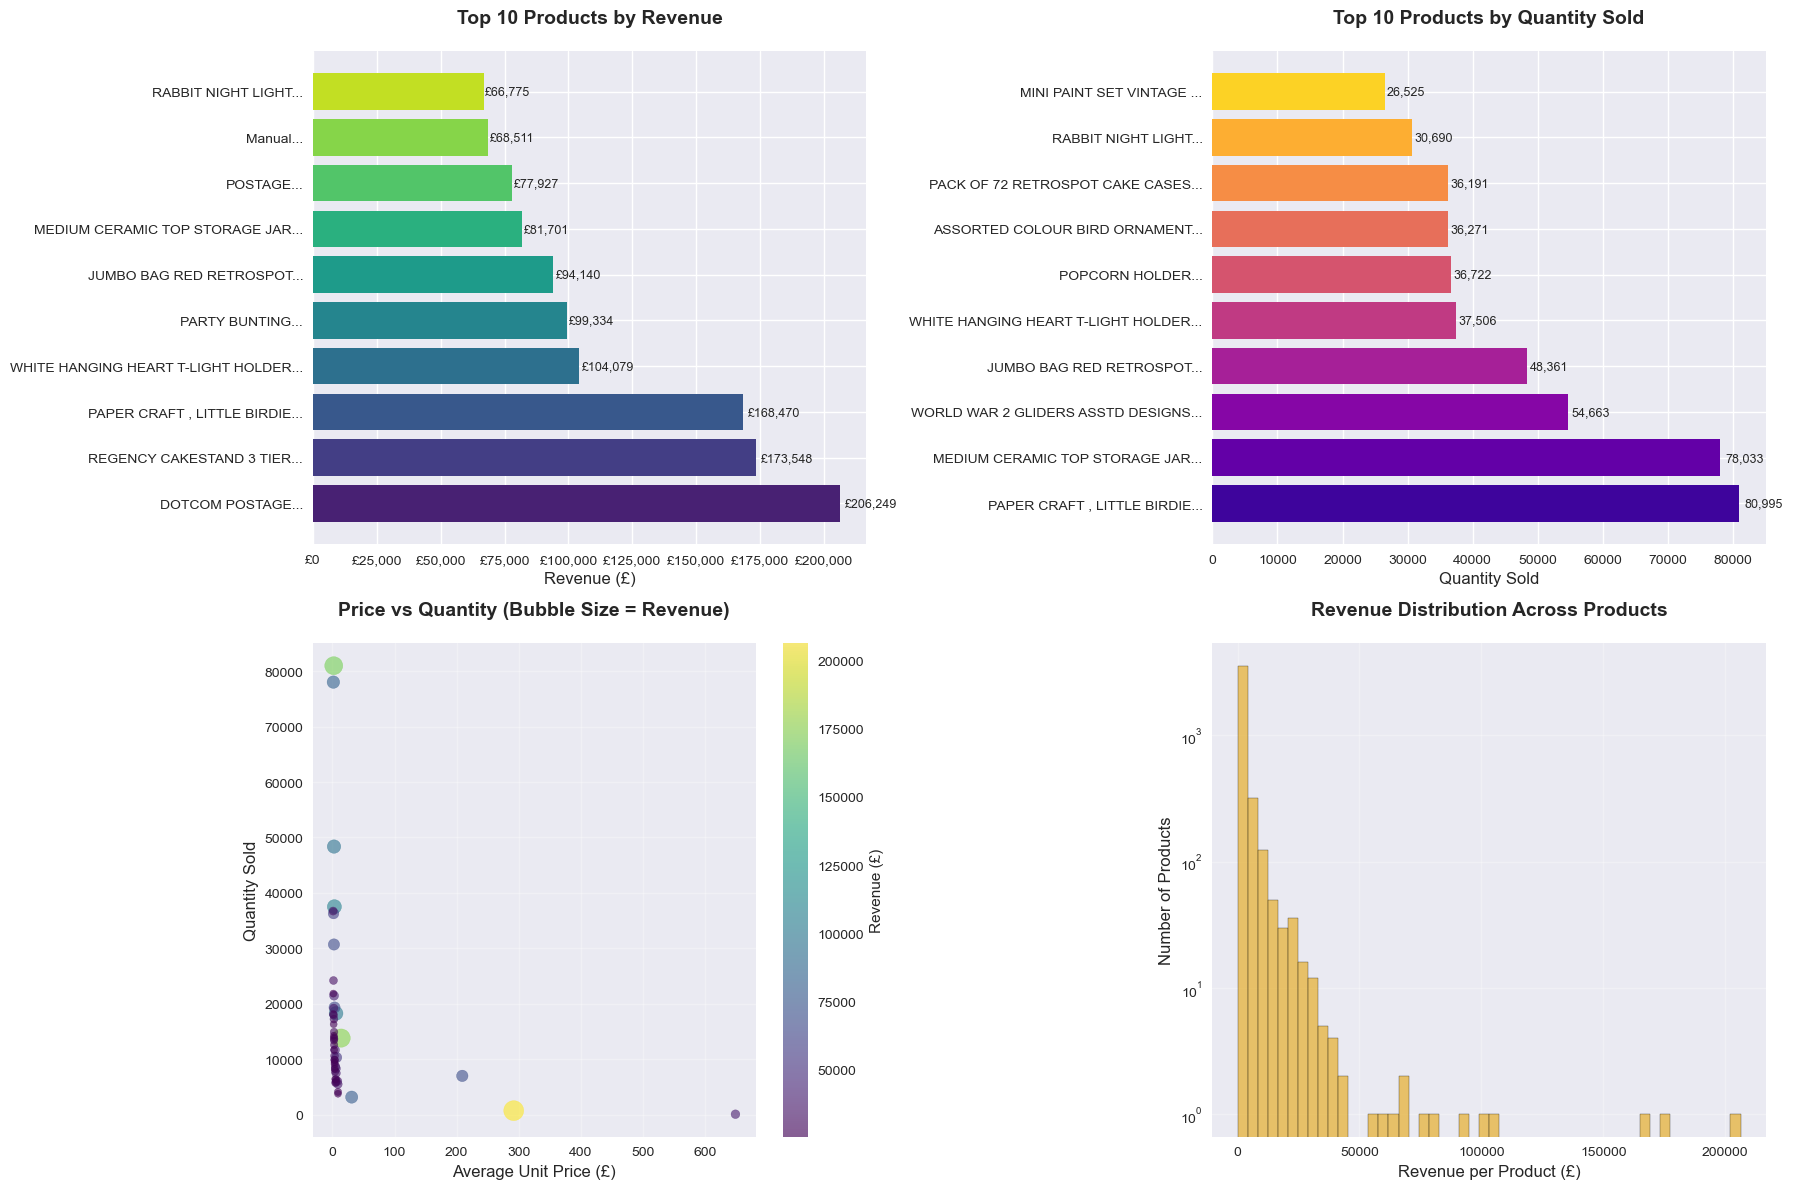

In [20]:
print("\n🏆 STEP 3: BEST-SELLING PRODUCTS ANALYSIS")
print("=" * 45)

# Get top products data
top_products_revenue = product_analysis.nlargest(10, 'TotalRevenue')
top_products_quantity = product_analysis.nlargest(10, 'Quantity')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Top 10 Products by Revenue (Horizontal Bar)
y_pos = np.arange(len(top_products_revenue))
axes[0,0].barh(y_pos, top_products_revenue['TotalRevenue'], 
               color=sns.color_palette("viridis", len(top_products_revenue)))
axes[0,0].set_yticks(y_pos)
axes[0,0].set_yticklabels([desc[:40] + '...' for desc in top_products_revenue.index.get_level_values(1)])
axes[0,0].set_xlabel('Revenue (£)', fontsize=12)
axes[0,0].set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold', pad=20)
axes[0,0].xaxis.set_major_formatter(currency_fmt)

# Add value labels on bars
for i, v in enumerate(top_products_revenue['TotalRevenue']):
    axes[0,0].text(v + v*0.01, i, f'£{v:,.0f}', va='center', fontsize=9)

# 2. Top 10 Products by Quantity
y_pos = np.arange(len(top_products_quantity))
bars = axes[0,1].barh(y_pos, top_products_quantity['Quantity'], 
                      color=sns.color_palette("plasma", len(top_products_quantity)))
axes[0,1].set_yticks(y_pos)
axes[0,1].set_yticklabels([desc[:40] + '...' for desc in top_products_quantity.index.get_level_values(1)])
axes[0,1].set_xlabel('Quantity Sold', fontsize=12)
axes[0,1].set_title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold', pad=20)

# Add value labels on bars
for i, v in enumerate(top_products_quantity['Quantity']):
    axes[0,1].text(v + v*0.01, i, f'{v:,.0f}', va='center', fontsize=9)

# 3. Price vs Quantity Scatter (Top 50 products)
top_50_products = product_analysis.nlargest(50, 'TotalRevenue')
axes[1,0].scatter(top_50_products['AvgUnitPrice'], top_50_products['Quantity'], 
                  s=top_50_products['TotalRevenue']/1000, alpha=0.6, 
                  c=top_50_products['TotalRevenue'], cmap='viridis')
axes[1,0].set_xlabel('Average Unit Price (£)', fontsize=12)
axes[1,0].set_ylabel('Quantity Sold', fontsize=12)
axes[1,0].set_title('Price vs Quantity (Bubble Size = Revenue)', fontsize=14, fontweight='bold', pad=20)
axes[1,0].grid(True, alpha=0.3)

# Add colorbar
plt.colorbar(axes[1,0].collections[0], ax=axes[1,0], label='Revenue (£)')

# 4. Revenue Distribution by Product
axes[1,1].hist(product_analysis['TotalRevenue'], bins=50, 
               edgecolor='black', alpha=0.7, color='#E6AF2E')
axes[1,1].set_xlabel('Revenue per Product (£)', fontsize=12)
axes[1,1].set_ylabel('Number of Products', fontsize=12)
axes[1,1].set_title('Revenue Distribution Across Products', fontsize=14, fontweight='bold', pad=20)
axes[1,1].set_yscale('log')  # Log scale for better visualization
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🏷️  STEP 4: PRODUCT CATEGORIES ANALYSIS


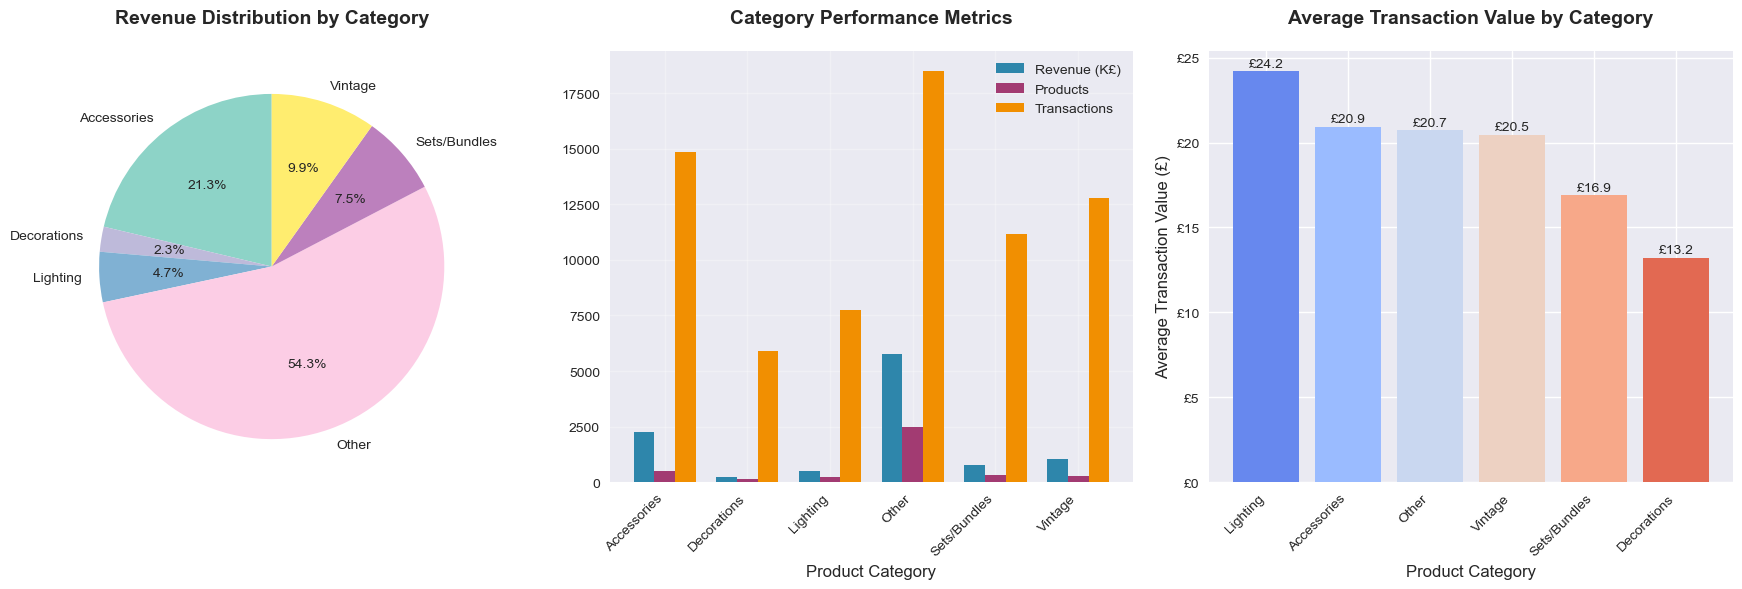

In [21]:
print("\n🏷️  STEP 4: PRODUCT CATEGORIES ANALYSIS")
print("=" * 45)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Revenue by Category (Pie Chart)
category_revenue = df_cleaned.groupby('ProductCategory')['TotalValue'].sum()
colors = plt.cm.Set3(np.linspace(0, 1, len(category_revenue)))
wedges, texts, autotexts = axes[0].pie(category_revenue, labels=category_revenue.index, 
                                       autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Revenue Distribution by Category', fontsize=14, fontweight='bold', pad=20)

# 2. Category Performance Metrics
category_metrics = df_cleaned.groupby('ProductCategory').agg({
    'TotalValue': 'sum',
    'StockCode': 'nunique',
    'InvoiceNo': 'nunique'
}).rename(columns={'TotalValue': 'Revenue', 'StockCode': 'Products', 'InvoiceNo': 'Transactions'})

x = np.arange(len(category_metrics))
width = 0.25

axes[1].bar(x - width, category_metrics['Revenue']/1000, width, label='Revenue (K£)', color='#2E86AB')
axes[1].bar(x, category_metrics['Products'], width, label='Products', color='#A23B72')
axes[1].bar(x + width, category_metrics['Transactions'], width, label='Transactions', color='#F18F01')

axes[1].set_xlabel('Product Category', fontsize=12)
axes[1].set_title('Category Performance Metrics', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xticks(x)
axes[1].set_xticklabels(category_metrics.index, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Average Transaction Value by Category
category_avg_value = df_cleaned.groupby('ProductCategory')['TotalValue'].mean().sort_values(ascending=False)
bars = axes[2].bar(range(len(category_avg_value)), category_avg_value, 
                   color=sns.color_palette("coolwarm", len(category_avg_value)))
axes[2].set_xlabel('Product Category', fontsize=12)
axes[2].set_ylabel('Average Transaction Value (£)', fontsize=12)
axes[2].set_title('Average Transaction Value by Category', fontsize=14, fontweight='bold', pad=20)
axes[2].set_xticks(range(len(category_avg_value)))
axes[2].set_xticklabels(category_avg_value.index, rotation=45, ha='right')
axes[2].yaxis.set_major_formatter(currency_fmt)

# Add value labels on bars
for bar, value in zip(bars, category_avg_value):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'£{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


👥 STEP 5: CUSTOMER ANALYSIS


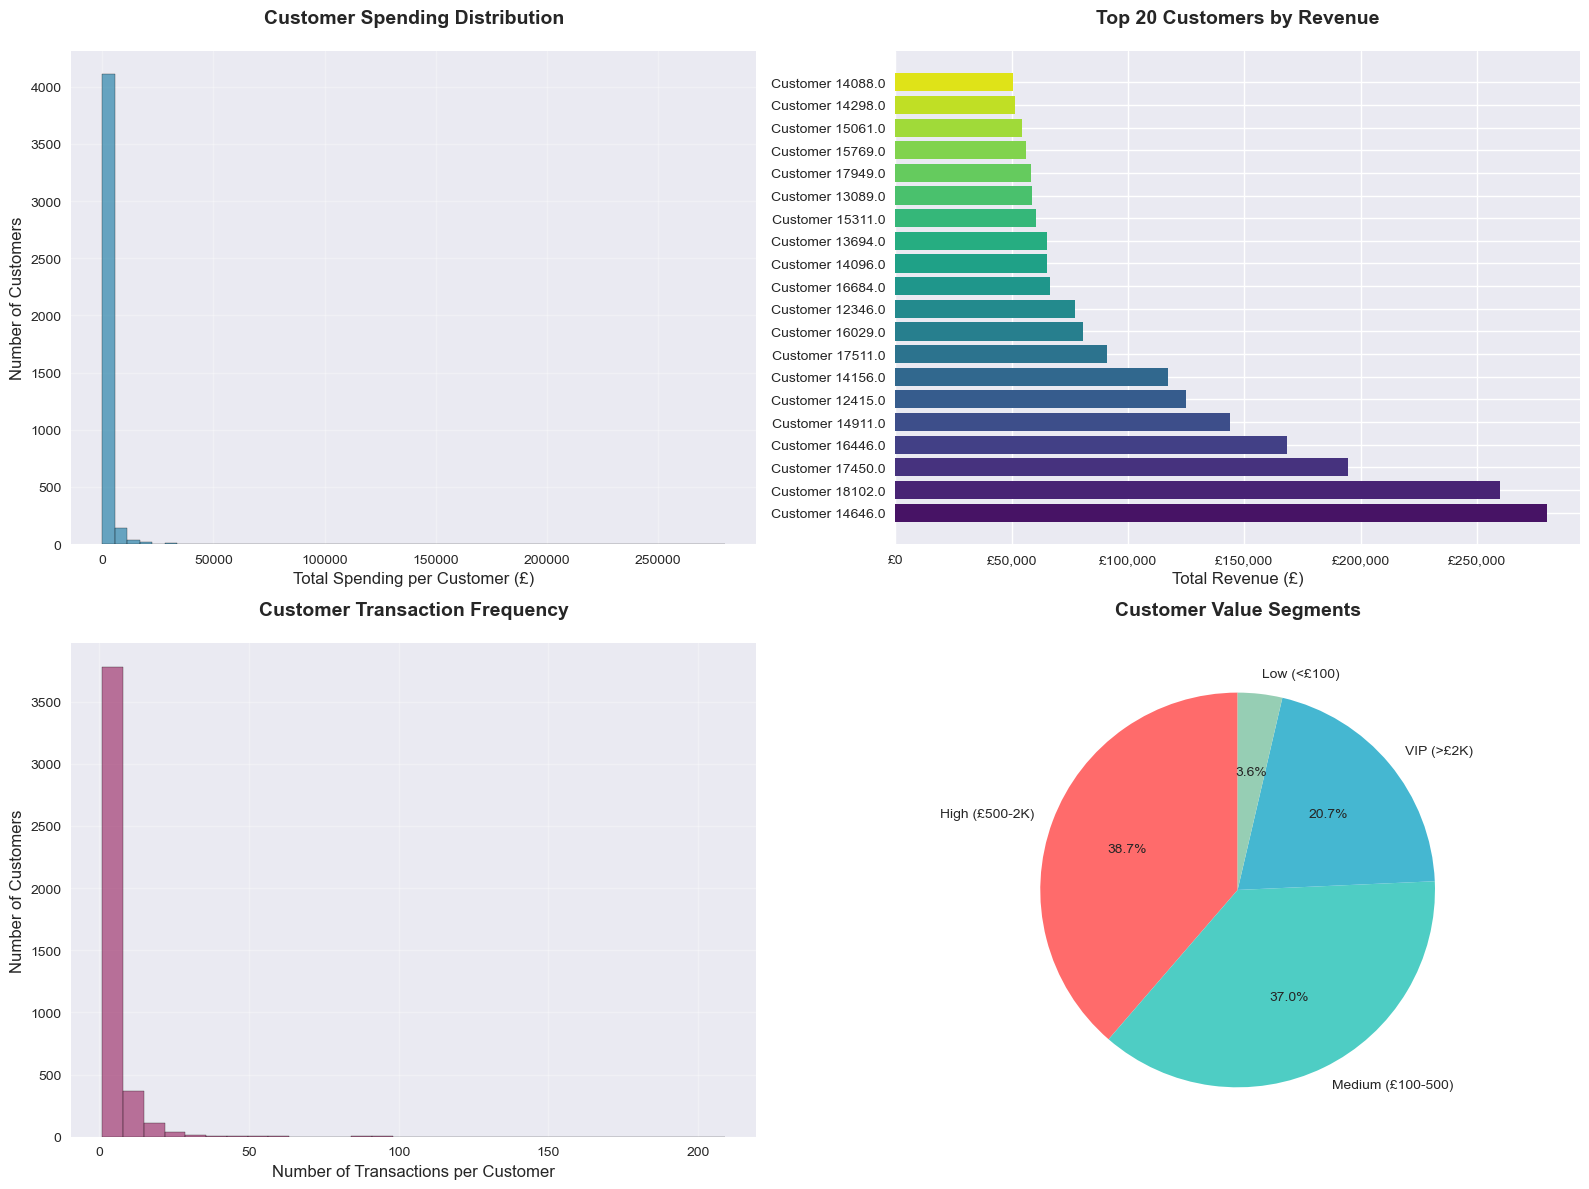

📊 Customer Base Summary:
   • Total Registered Customers: 4,338
   • Average Customer Lifetime Value: £2048.69
   • Top Customer Spent: £280,206.02
   • Customers with 1 transaction: 1,493


In [22]:
print("\n👥 STEP 5: CUSTOMER ANALYSIS")
print("=" * 35)

if 'CustomerID' in df_cleaned.columns and len(registered_customers) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Customer Spending Distribution
    customer_spending = registered_customers.groupby('CustomerID')['TotalValue'].sum()
    axes[0,0].hist(customer_spending, bins=50, edgecolor='black', alpha=0.7, color='#2E86AB')
    axes[0,0].set_xlabel('Total Spending per Customer (£)', fontsize=12)
    axes[0,0].set_ylabel('Number of Customers', fontsize=12)
    axes[0,0].set_title('Customer Spending Distribution', fontsize=14, fontweight='bold', pad=20)
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Top 20 Customers by Revenue
    top_customers = customer_spending.nlargest(20)
    y_pos = np.arange(len(top_customers))
    axes[0,1].barh(y_pos, top_customers.values, color=sns.color_palette("viridis", len(top_customers)))
    axes[0,1].set_yticks(y_pos)
    axes[0,1].set_yticklabels([f'Customer {cid}' for cid in top_customers.index])
    axes[0,1].set_xlabel('Total Revenue (£)', fontsize=12)
    axes[0,1].set_title('Top 20 Customers by Revenue', fontsize=14, fontweight='bold', pad=20)
    axes[0,1].xaxis.set_major_formatter(currency_fmt)
    
    # 3. Customer Transaction Frequency
    customer_transactions = registered_customers.groupby('CustomerID')['InvoiceNo'].nunique()
    axes[1,0].hist(customer_transactions, bins=30, edgecolor='black', alpha=0.7, color='#A23B72')
    axes[1,0].set_xlabel('Number of Transactions per Customer', fontsize=12)
    axes[1,0].set_ylabel('Number of Customers', fontsize=12)
    axes[1,0].set_title('Customer Transaction Frequency', fontsize=14, fontweight='bold', pad=20)
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Customer Value Segments
    customer_segments = pd.cut(customer_spending, 
                              bins=[0, 100, 500, 2000, float('inf')], 
                              labels=['Low (<£100)', 'Medium (£100-500)', 'High (£500-2K)', 'VIP (>£2K)'])
    segment_counts = customer_segments.value_counts()
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    wedges, texts, autotexts = axes[1,1].pie(segment_counts, labels=segment_counts.index, 
                                            autopct='%1.1f%%', colors=colors, startangle=90)
    axes[1,1].set_title('Customer Value Segments', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Customer metrics summary
    print(f"📊 Customer Base Summary:")
    print(f"   • Total Registered Customers: {len(customer_spending):,}")
    print(f"   • Average Customer Lifetime Value: £{customer_spending.mean():.2f}")
    print(f"   • Top Customer Spent: £{customer_spending.max():,.2f}")
    print(f"   • Customers with 1 transaction: {(customer_transactions == 1).sum():,}")


🌍 STEP 6: GEOGRAPHIC ANALYSIS


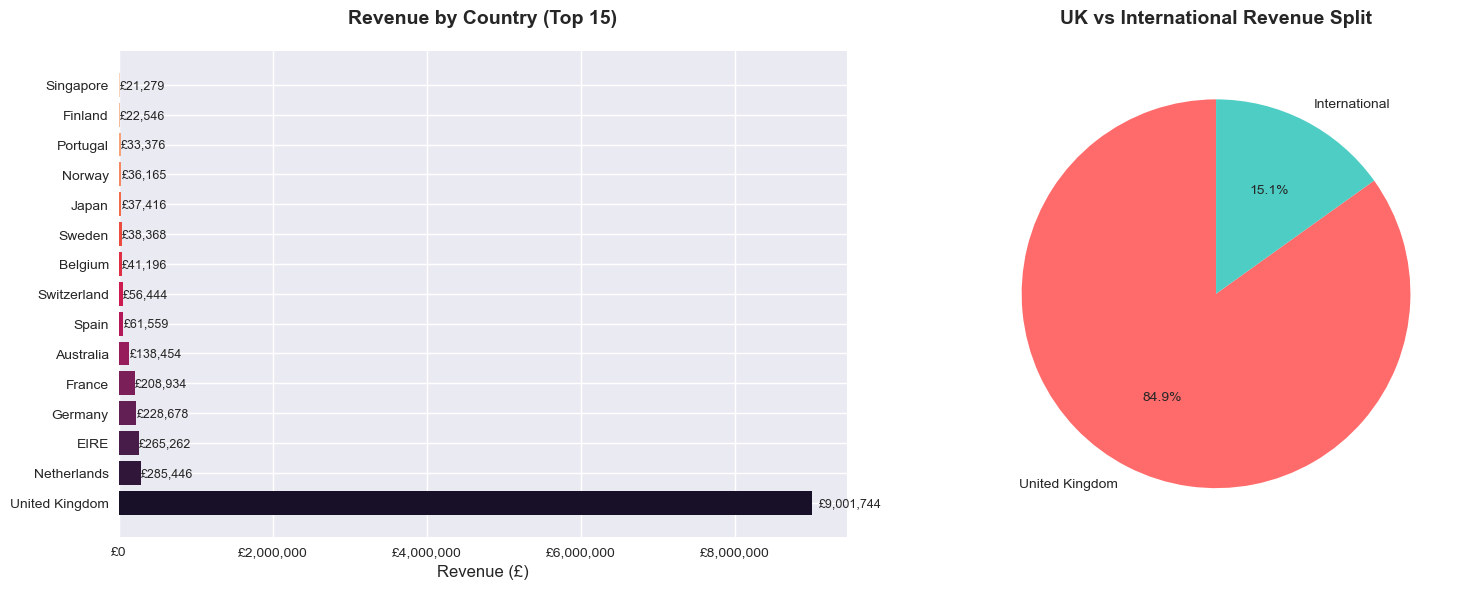

🇬🇧 UK Revenue: £9,001,744.09 (84.9%)
🌍 International Revenue: £1,602,184.25 (15.1%)


In [23]:
print("\n🌍 STEP 6: GEOGRAPHIC ANALYSIS")
print("=" * 35)

# Country analysis
country_analysis = df_cleaned.groupby('Country').agg({
    'TotalValue': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).rename(columns={
    'TotalValue': 'Revenue',
    'InvoiceNo': 'Transactions',
    'CustomerID': 'Customers'
}).sort_values('Revenue', ascending=False)

# Top 15 countries
top_countries = country_analysis.head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Revenue by Country (Top 15)
y_pos = np.arange(len(top_countries))
axes[0].barh(y_pos, top_countries['Revenue'], color=sns.color_palette("rocket", len(top_countries)))
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(top_countries.index)
axes[0].set_xlabel('Revenue (£)', fontsize=12)
axes[0].set_title('Revenue by Country (Top 15)', fontsize=14, fontweight='bold', pad=20)
axes[0].xaxis.set_major_formatter(currency_fmt)

# Add value labels
for i, v in enumerate(top_countries['Revenue']):
    axes[0].text(v + v*0.01, i, f'£{v:,.0f}', va='center', fontsize=9)

# 2. UK vs International Revenue
uk_revenue = country_analysis.loc['United Kingdom', 'Revenue'] if 'United Kingdom' in country_analysis.index else 0
international_revenue = country_analysis['Revenue'].sum() - uk_revenue

labels = ['United Kingdom', 'International']
sizes = [uk_revenue, international_revenue]
colors = ['#FF6B6B', '#4ECDC4']

axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('UK vs International Revenue Split', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print(f"🇬🇧 UK Revenue: £{uk_revenue:,.2f} ({uk_revenue/country_analysis['Revenue'].sum()*100:.1f}%)")
print(f"🌍 International Revenue: £{international_revenue:,.2f} ({international_revenue/country_analysis['Revenue'].sum()*100:.1f}%)")


📊 STEP 7: SUMMARY DASHBOARD


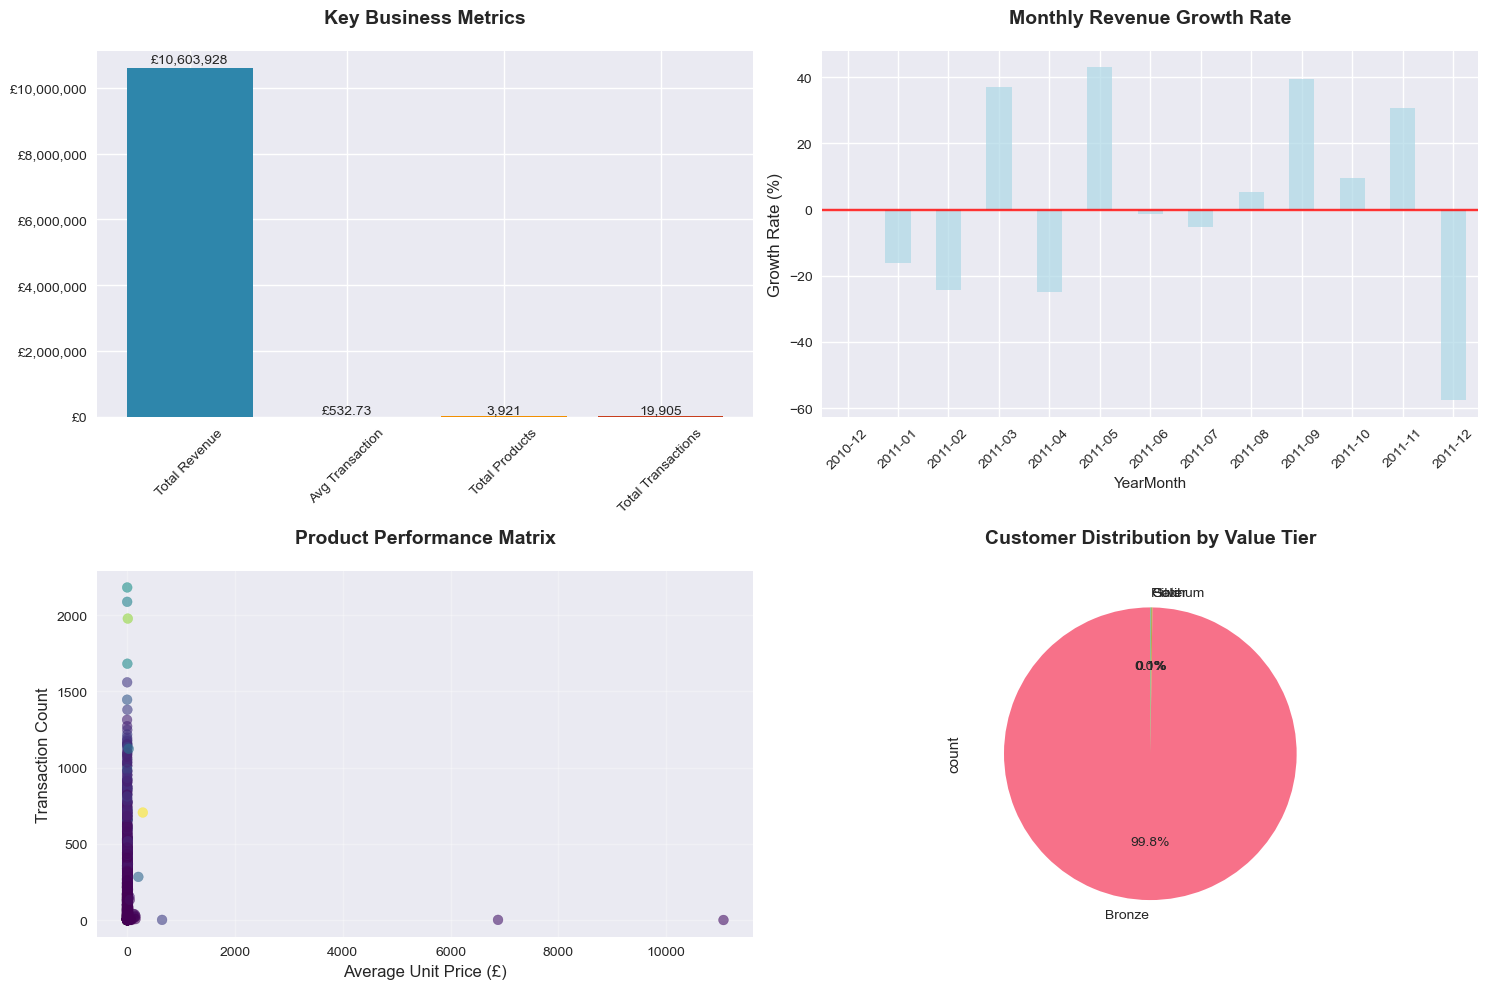

✅ All visualizations completed! Review the charts for business insights.


In [24]:
print("\n📊 STEP 7: SUMMARY DASHBOARD")
print("=" * 35)

# Create a summary figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Key Metrics Summary
metrics = {
    'Total Revenue': total_revenue,
    'Avg Transaction': avg_transaction_value,
    'Total Products': total_products,
    'Total Transactions': total_transactions
}

bars = axes[0,0].bar(range(len(metrics)), metrics.values(), color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
axes[0,0].set_title('Key Business Metrics', fontsize=14, fontweight='bold', pad=20)
axes[0,0].set_xticks(range(len(metrics)))
axes[0,0].set_xticklabels(metrics.keys(), rotation=45)
axes[0,0].yaxis.set_major_formatter(currency_fmt)

# Add value labels
for bar, (label, value) in zip(bars, metrics.items()):
    if 'Revenue' in label or 'Transaction' in label and 'Avg' in label:
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar.get_height()*0.01, 
                      f'£{value:,.0f}' if value > 1000 else f'£{value:.2f}', 
                      ha='center', va='bottom', fontsize=10)
    else:
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar.get_height()*0.01, 
                      f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

# 2. Monthly Growth Rates
monthly_trends['RevenueGrowth'].plot(kind='bar', ax=axes[0,1], color='lightblue', alpha=0.7)
axes[0,1].set_title('Monthly Revenue Growth Rate', fontsize=14, fontweight='bold', pad=20)
axes[0,1].set_ylabel('Growth Rate (%)', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].axhline(y=0, color='red', linestyle='-', alpha=0.8)

# 3. Product Performance Matrix
axes[1,0].scatter(product_analysis['AvgUnitPrice'], product_analysis['TransactionCount'], 
                  alpha=0.6, c=product_analysis['TotalRevenue'], cmap='viridis', s=50)
axes[1,0].set_xlabel('Average Unit Price (£)', fontsize=12)
axes[1,0].set_ylabel('Transaction Count', fontsize=12)
axes[1,0].set_title('Product Performance Matrix', fontsize=14, fontweight='bold', pad=20)
axes[1,0].grid(True, alpha=0.3)

# 4. Customer Distribution by Value
if 'CustomerID' in df_cleaned.columns and len(registered_customers) > 0:
    customer_segments = pd.cut(customer_spending, bins=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
    segment_counts = customer_segments.value_counts()
    segment_counts.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Customer Distribution by Value Tier', fontsize=14, fontweight='bold', pad=20)
else:
    axes[1,1].text(0.5, 0.5, 'No Customer Data\nAvailable', ha='center', va='center', 
                   transform=axes[1,1].transAxes, fontsize=12)
    axes[1,1].set_title('Customer Distribution', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✅ All visualizations completed! Review the charts for business insights.")